### **Twitter Entity Sentiment Analysis**

### **Step 1 : Load the Dataset**

In [3]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Admin\\Downloads\\twitter_training.csv~\\twitter_training.csv")
#print(df)

# Display first 5 rows
print(df.head())

# Check basic info
print("\nDataset Info : ")
print(df.info())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Dataset Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-nul

##### **- The dataset has 74,681 rows and 4 columns**
##### **- Columns appear unnamed - they are : Tweet Id or Serial number, Entity(e.g., brand or product), Sentiment, Tweet text** 

### **Step 2 : Rename columns & handle missing values**

In [6]:
# Rename columns for clarity
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

# Display first 5 rows to confirm changes
print(df.head())

# Check for missing values
print("\nMssing Values : ", df.isnull().sum())

     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  

Mssing Values :  ID             0
Entity         0
Sentiment      0
Tweet        686
dtype: int64


##### **- Cleaned the column names**
##### **- Identified 686 missing tweets**

### **Step 3 : Drop missing Tweet rows**

In [9]:
# Drop rows where tweet is null
df.dropna(subset = ['Tweet'], inplace = True)

# Reset index
df.reset_index(drop = True, inplace = True)

# Confirm changes
print("Shape after removing  missing values : ", df.shape)

Shape after removing  missing values :  (73995, 4)


### **Step 4 : Text Preprocessing**
##### **- Lowercase all text**
##### **- Remove speacial characters, numbers, and unnecessary punctuation.**
##### **- Remove stopwords (common words like "the", "is", etc.)**
##### **- Tokenize the text.**

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwards (if not already downloaded)
#nltk.download ('stopwords')
#nltk.download ('punkt')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess the text 
def preprocess_text (text) :
    # Lowercase the text
    text = text.lower( )
    # Remove special characters, numbers, and punctuation
    text = re.sub (r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize (text)
    text = ' '.join([word for word in tokens if word not in stop_words])
    return text

# Apply preprocessing to the 'Tweet' column
df['Tweet'] = df['Tweet'].apply(preprocess_text)

# Check the first 5 rows
print(df.head())

     ID       Entity Sentiment                          Tweet
0  2401  Borderlands  Positive            coming borders kill
1  2401  Borderlands  Positive    im getting borderlands kill
2  2401  Borderlands  Positive   im coming borderlands murder
3  2401  Borderlands  Positive  im getting borderlands murder
4  2401  Borderlands  Positive  im getting borderlands murder


### **Step 5 : Feature Extraction**
##### **- Using TF-IDF (Term Frequency-Inverse Document Frequency)**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer (max_features = 5000)       # We can Increase or decrease based on performance

# Fit and transform the Tweet column
X = vectorizer.fit_transform(df['Tweet'])

# Target variable
y = df['Sentiment']

# Check the shape of resulting feature matrix
print("TF-IDF Feature Matrix Shape : ", X.shape)

TF-IDF Feature Matrix Shape :  (73995, 5000)


##### **- The TF-IDF feature matrix has 73,995 samples and 5000 features, indicating that we are working with 5000 unique words/features extracted from the cleaned tweets**
##### **- This sparse matrix will be used to train our model, with each tweet represented as a 5000-dimensional vector**

### **Step 6 : Model Training**
##### **- We will train a machine learning model to classify the tweets based on sentiment (positive or negative)**
##### **- Using Logistic Regressing for this classification**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf_matrix = vectorizer.fit_transform(df(['Tweet']))
                                
# Define features and target variable 
#X = tfidf_matrix
#y = df['Sentiment']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter = 1000)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Test Accuracy : ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix : ", confusion_matrix(y_test, y_pred))
print("\nClassification Report : ", classification_report(y_test, y_pred))

Test Accuracy :  0.6897087641056828

Confusion Matrix :  [[1416  377  383  448]
 [ 176 3427  465  395]
 [ 229  505 2365  490]
 [ 218  396  510 2999]]

Classification Report :                precision    recall  f1-score   support

  Irrelevant       0.69      0.54      0.61      2624
    Negative       0.73      0.77      0.75      4463
     Neutral       0.64      0.66      0.65      3589
    Positive       0.69      0.73      0.71      4123

    accuracy                           0.69     14799
   macro avg       0.69      0.67      0.68     14799
weighted avg       0.69      0.69      0.69     14799



##### **- The model acheived ~69% accuracy, performing best on negative and positive sentiments.**
##### **- Irrelevant tweets were the hardest to classify, indicating possible ambiguity or noise in that class.**

### **Step 7 : Visualize Sentiment Distribution**

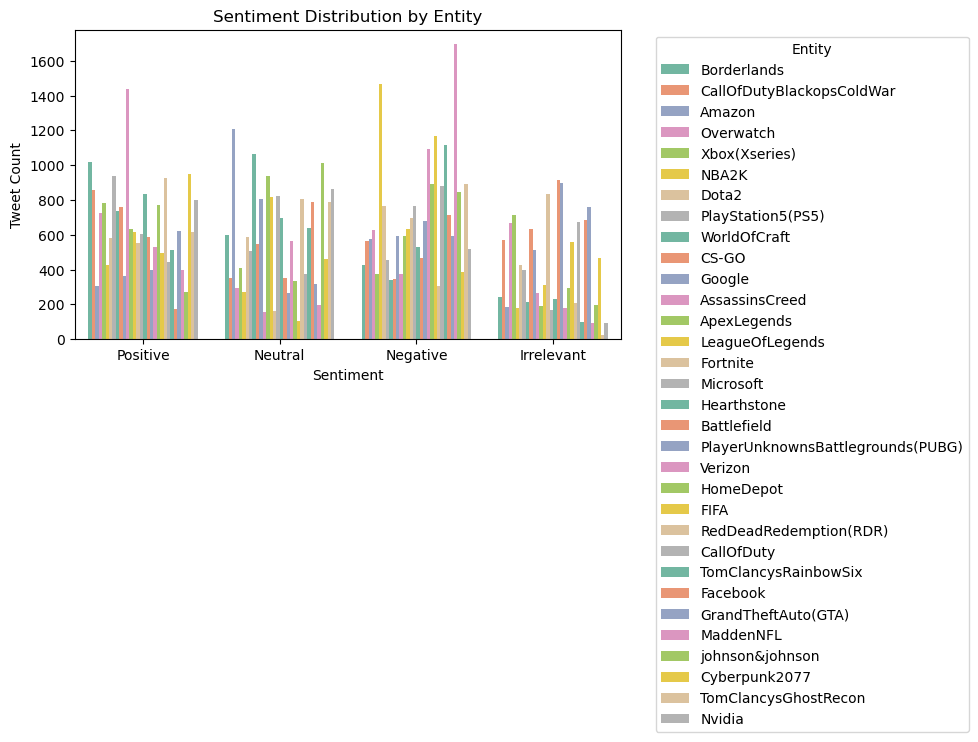

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Sentiment distruibution
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Sentiment', data = df, hue = 'Entity', palette = 'Set2')

plt.legend(title = 'Entity', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.tight_layout()
plt.show()

##### **- Sentiment distribution varies significantly across entities : Some brands like FIFA, Amazon, and PlayStation5(PS5) show higher tweet valoumes in the Negative and Positive categories, indicating strong polarizinf opinions.**
##### **- Irrelevant sentiment is consistently lower, suggesting that most user tweets carry sentiment-driven content about the entities.**

### **Step 8 : Brand-wise Sentiment Analysis**

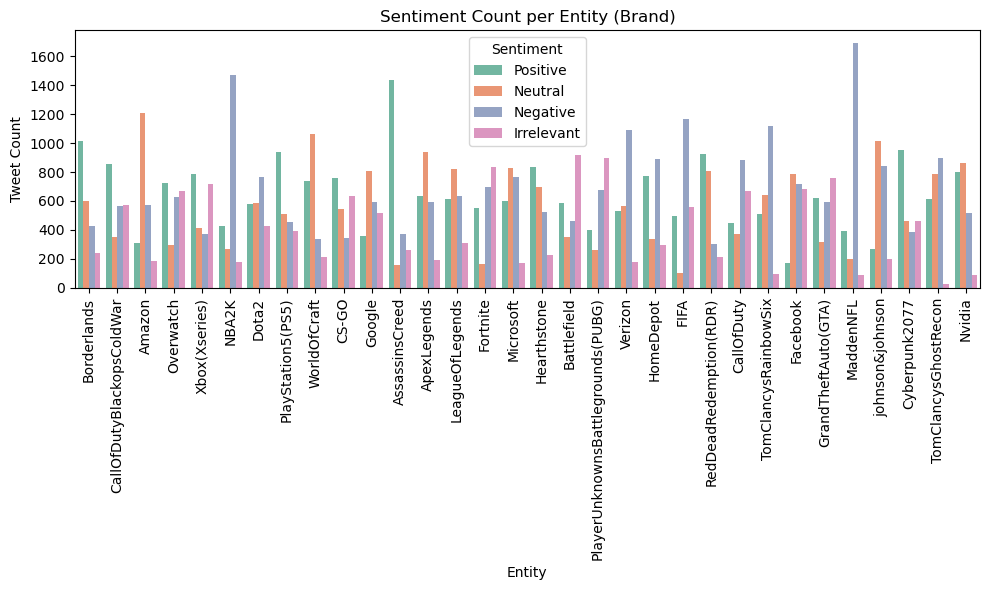

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Entity', hue='Sentiment', data=df, palette='Set2')
plt.title("Sentiment Count per Entity (Brand)")
plt.xlabel("Entity")
plt.ylabel("Tweet Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### **- Amazon, FIFA, and PS5 show high tweet volumes, indicating they are among the most discussed brands with diverse sentiment distributions.**
##### **- Brands like CallOfDutyBlackopsColdWar and Overwatch have more positive sentiment, suggesting favourite public opinion on social media.**

### **Step 9 : WordCloud Visualization for each Sentiment**

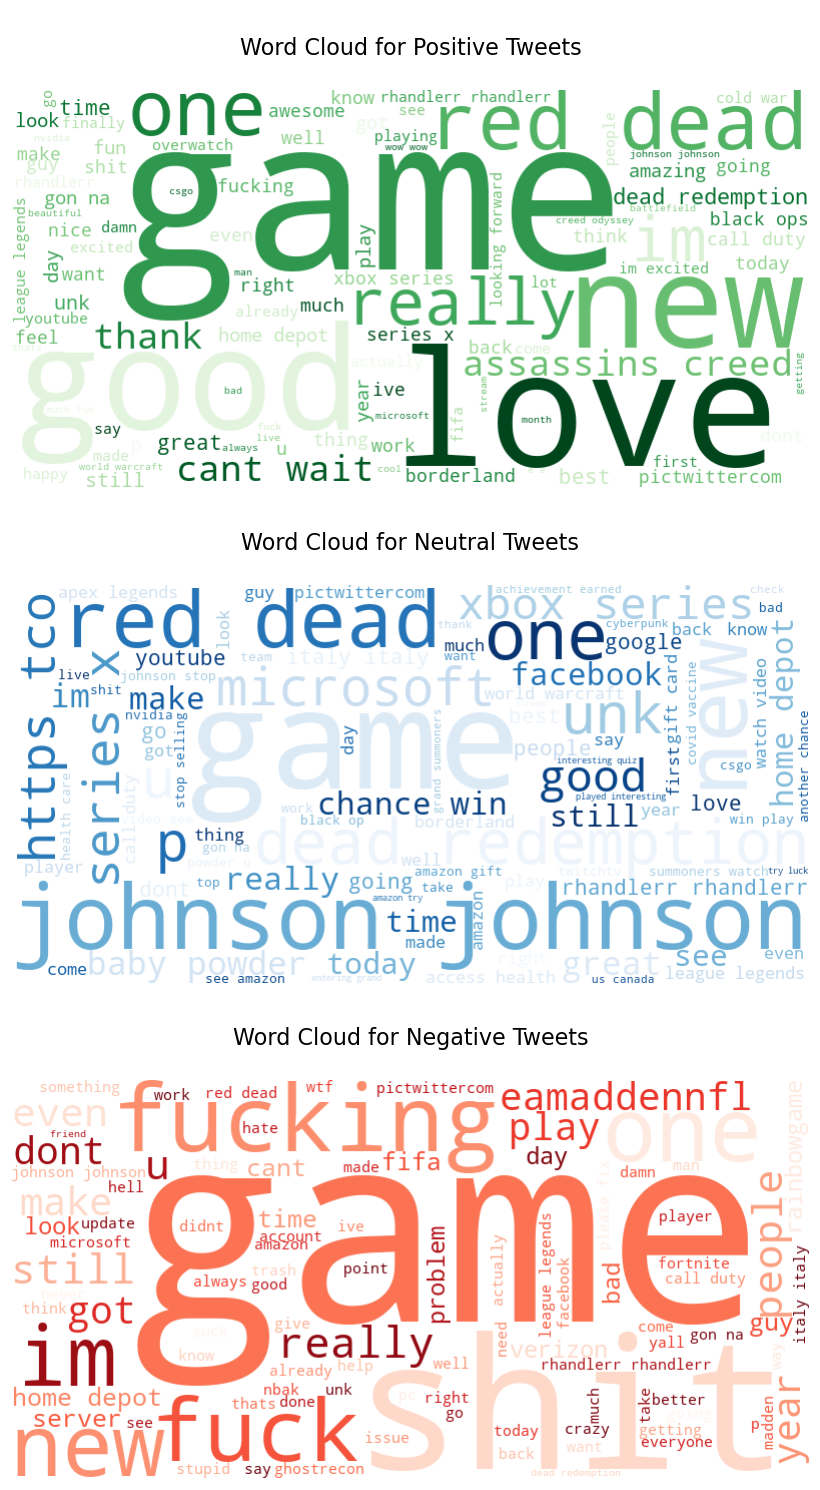

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word clouds for each sentiment
sentiments = ['Positive', 'Neutral', 'Negative']
colors = ['Greens', 'Blues', 'Reds']

plt.figure(figsize = (10, 15))

# Combine all tweets
for idx, sentiment in enumerate(sentiments):
    text = ' '.join(df[df['Sentiment'] == sentiment]['Tweet'].astype(str))
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', colormap = colors[idx], max_words = 100).generate(text)

    plt.subplot(3, 1, idx + 1)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(f'\nWord Cloud for {sentiment} Tweets\n', fontsize = 16)

plt.tight_layout()
plt.show()

#### **Positive Tweets :**
##### - Words like "game", "love", "good", "new", and "thank" dominate, reflecting excitement, appreciation, and enthusiasm toward games and tech products.
#### **Neutral Tweets :**
##### - Common terms include "game", "johnson", "dead", "series", and "xbox", indicating  or descriptive tweets mentioning entities without strong opinions.
#### **Negative Tweets :**
##### - Strong negative language appears, such as "fucking", "shit", "problem", and "dont", showing clear dissatisfaction, likely tied to performance issues or poor experiences with games or brands